## importing the required libruaries

In [55]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

### data collection and analysis
### data set is diabeties¶

In [56]:
# loading the dataset to a pandas dataframe
house_price_dataset=pd.read_csv("C:\machine learning\machine learning datasets\Housing.csv")

In [57]:
house_price_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [58]:
house_price_dataset.shape

(545, 13)

In [59]:
house_price_dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [60]:
house_price_dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [61]:
house_price_dataset['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [62]:
house_price_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [63]:
house_price_dataset['mainroad']=house_price_dataset['mainroad'].map({'yes':1,"no":0})
house_price_dataset['guestroom']=house_price_dataset['guestroom'].map({'yes':1,"no":0})
house_price_dataset['basement']=house_price_dataset['basement'].map({'yes':1,"no":0})
house_price_dataset['hotwaterheating']=house_price_dataset['hotwaterheating'].map({'yes':1,"no":0})
house_price_dataset['airconditioning']=house_price_dataset['airconditioning'].map({'yes':1,"no":0})
house_price_dataset['prefarea']=house_price_dataset['prefarea'].map({'yes':1,"no":0})
house_price_dataset['furnishingstatus']=house_price_dataset['furnishingstatus'].map({'semi-furnished':1,"unfurnished":2,"furnished":3})


house_price_dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,3


### understanding the various types of correlatio

In [64]:
#1.positive correlation
#2.negative correlation

In [65]:
correlation=house_price_dataset.corr()

<Axes: >

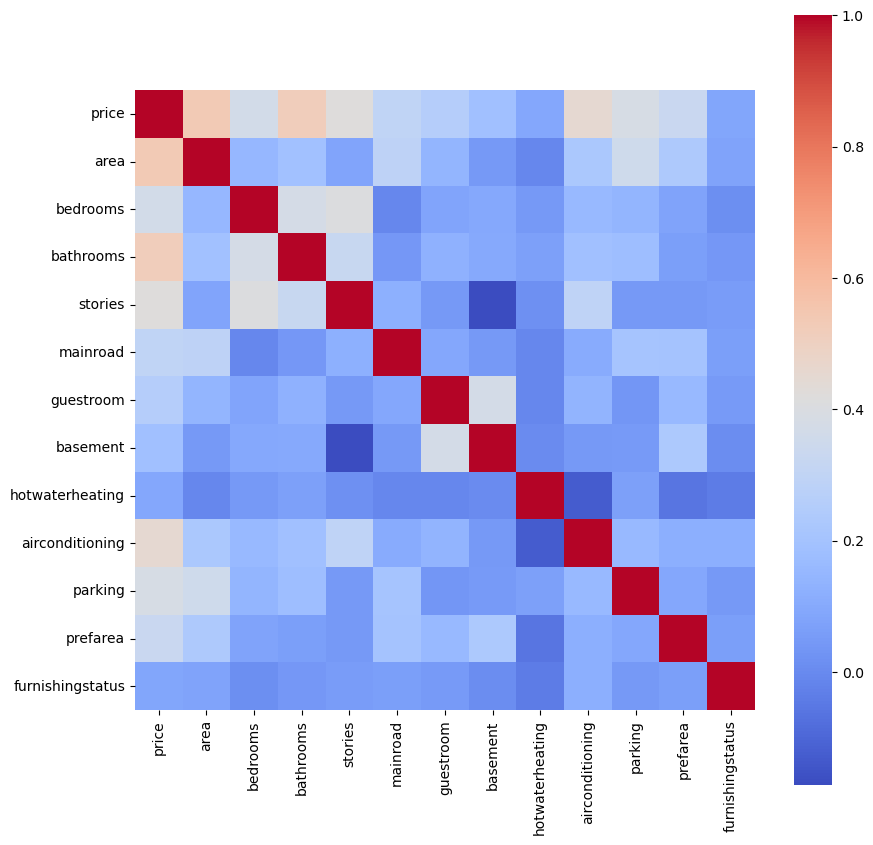

In [66]:
# constructing the heat map to understand the correlation 
plt.figure(figsize=(10,10))

sns.heatmap(correlation,cbar=True,square=True,fmt=' .if',annot_kws={'size':8},cmap='coolwarm')

### split the data and target

In [67]:
x=house_price_dataset.drop(['price'], axis=1)
y=house_price_dataset['price']

In [68]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,3
1,8960,4,4,4,1,0,0,0,1,3,0,3
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,3
4,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,3


In [69]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

## splitting the data into training data and testing data

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [85]:
print(x.shape,x_train.shape,x_test.shape)

(545, 12) (381, 12) (164, 12)


### model training

### XGBoost regressor

In [86]:
# loading the model
model=XGBRegressor()

In [87]:
# training the model with x train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### evaluation 

#### prediction on the data

In [88]:
# accuracy for prediction on training data
training_data_prediction=model.predict(x_train)
training_data_prediction

array([ 5324648. ,  3650081.5,  3844972.8,  3648176.2,  4158328. ,
        7409891. ,  4289424. ,  6021141.5,  2919902.8,  3769753.8,
        5550105.5,  6714523. ,  5883295.5,  5438676. ,  5578050. ,
        3324878.2,  3514787.2,  2823414.2,  4907190.5,  5231521. ,
        3702666.8,  5838940. ,  4217770.5,  6814481. ,  5386041.5,
        3081768.8,  3556235.8,  6602383.5,  4899910. ,  5894666.5,
        8419326. ,  2680843.8,  3299092.2,  9778659. ,  4121975.8,
        3064762.8,  8945492. ,  4416839. ,  2297613. ,  3371099.5,
        4859133. ,  3486867.2,  5956399. ,  3616391.5,  4337348. ,
        4809851.5,  2884087.5,  5246944.5,  5600710. ,  8430722. ,
        4340699.5,  5606978.5,  2970156.2,  3526032. ,  4214791. ,
        4993454.5,  3705901.2,  3008050.5,  6144943. ,  6441786. ,
        3158609.5,  4639747. ,  2969033.8,  5018552.5,  2347503.5,
       12215333. ,  7702748.5,  5466952. ,  3231275. ,  5174132.5,
        3227484.8,  3027186.2,  6235488.5,  3445871.8,  812431

In [89]:


# r square error 
score_1=metrics.r2_score(y_train,training_data_prediction)

# mean absolute value
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)

In [90]:
print('r square error: ',score_1)
print('mean absolute error :',score_2)

r square error:  0.9974856224005644
mean absolute error : 46211.194881889765


###  prediction on the test data

In [91]:
# accuracy for prediction on test data
test_data_prediction=model.predict(x_test)
test_data_prediction

array([2832354. , 4247197. , 2595758.2, 3695072.2, 5737591. , 4447752.5,
       4264510.5, 2507231.8, 3167114.5, 4176584.8, 3170114.5, 3637007.2,
       3550817.2, 4943822. , 5527085.5, 5945621.5, 6230404.5, 4128489.5,
       3359320.2, 4228491.5, 4421727. , 4430645. , 4438861.5, 6391914. ,
       2166916.8, 3169071.2, 3200321.8, 4566712. , 4594244. , 3240031.8,
       4396748.5, 3729158. , 3926414.8, 4566896. , 3978630.8, 8282611.5,
       2471893. , 7485498. , 6005445.5, 3067117.2, 6215288.5, 3001928.2,
       2998077.5, 4497811.5, 3188135.8, 4623580. , 2468783.2, 3659715.8,
       4304969.5, 4100761.5, 6288238.5, 5997523.5, 2530220.5, 3200321.8,
       3565147.5, 5326391.5, 4219711.5, 4478752. , 1858832.9, 7819104. ,
       3279111.5, 3316418.8, 4112579. , 5999294. , 7972714.5, 6701139.5,
       3586943. , 4721795. , 3439815. , 6672379. , 6149457.5, 4252458.5,
       6475794.5, 6049688. , 4983755.5, 5160953.5, 6085823. , 6025713. ,
       7250223.5, 5978231. , 6621411.5, 4003783.8, 

In [92]:


# r square error 
score_1=metrics.r2_score(y_test,test_data_prediction)

# mean absolute value
score_2=metrics.mean_absolute_error(y_test,test_data_prediction)

print('r square error: ',score_1)
print('mean absolute error :',score_2)

r square error:  0.4355362519142236
mean absolute error : 958431.5952743902


### visualizing the actual price and predictird price

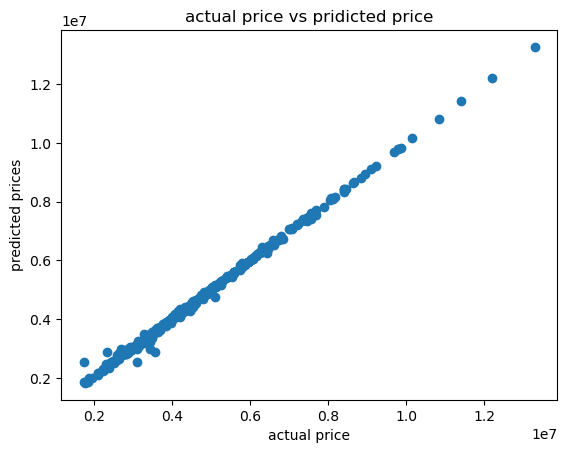

In [93]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted prices')
plt.title('actual price vs pridicted price')
plt.show()          